## Lista_04


In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy as scp
from scipy import sparse
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.sparse import linalg
from scipy.sparse import csc_matrix
from scipy.stats import ortho_group
import time
from mpl_toolkits import mplot3d
from matplotlib import cm


### ex 01


In [2]:
def francis(n, maxi, nook):
    k = 0
    e = 0
    matriz_a = np.zeros((n, n))
    V = np.identity(n)

    # matriz randomica mas canonica
    for i in range(n):
        for j in range(i, n):
            matriz_a[i, j] = matriz_a[j, i] = np.random.randint(0, 100)
            
            if i != j and abs(matriz_a[i, j]) > e:
                e = abs(matriz_a[i, j])

    while e > maxi and k < nook:
        Q, R = scp.linalg.qr(matriz_a)

        V = R @ V
        matriz_a = Q @ R

        # Recalculate e (maximum off-diagonal element)
        e = 0
        for i in range(n):
            for j in range(i + 1, n):
                if abs(matriz_a[i, j]) > e:
                    e = abs(matriz_a[i, j])

        k += 1

    return matriz_a, V

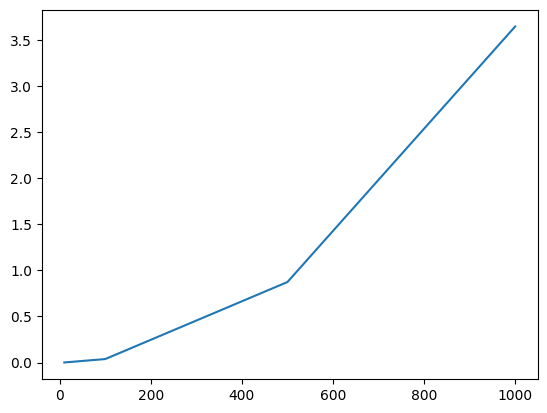

In [3]:
N = [10, 100, 500, 1000]

maxi = pow(10, 3)

t = 10**-8


lista = []

for i in N:
    t = time.time()
    francis(i, maxi, t)
    lista.append(time.time() - t)


#grafico de n pela lista
plt.plot(N, lista)

In [4]:
import numpy as np
import scipy.linalg
import time
import plotly.graph_objects as go

# Função para criar uma matriz simétrica
def cria_matriz_simetrica(n):
    matriz = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            valor = np.random.randint(0, 100)
            matriz[i, j] = valor
            matriz[j, i] = valor
    return matriz

# Implementação do método de Francis para autovalores
def metodo_francis(matriz, max_iteracoes, tolerancia, tamanho):
    iteracao = 1
    V = np.identity(tamanho)
    erro = 0.02
    while erro > tolerancia and iteracao < max_iteracoes:
        Q, R = scipy.linalg.qr(matriz)
        matriz = R @ Q
        V = V @ Q
        erro = 0
        for x in range(tamanho):
            for y in range(tamanho):
                if x != y and abs(matriz[x, y]) > erro:
                    erro = abs(matriz[x, y])
        iteracao += 1
    return matriz

# Parâmetros
tamanhos = [10, 50, 100]
max_iteracoes = 10000
tolerancia = 0.01
tempos = []

# Medição de tempo para diferentes tamanhos de matrizes
for tamanho in tamanhos:
    matriz = cria_matriz_simetrica(tamanho)
    tempo_inicial = time.time()
    metodo_francis(matriz, max_iteracoes, tolerancia, tamanho)
    tempos.append(time.time() - tempo_inicial)

# Criação da tabela para visualização dos tempos
figura = go.Figure(data=[go.Table(header=dict(values=['Tamanho (N)', 'Tempo (s)']),
                                  cells=dict(values=[tamanhos, tempos]))])
figura.update_layout(width=600, height=300, margin=dict(b=10, l=10, r=10, t=10))
figura.show()


### ex 02


In [5]:
import numpy as np
import scipy.stats as scp

def criar_matriz_autovalores(n, autovalores):

    # Verificação de comprimento dos autovalores
    if len(autovalores) != n:
        raise ValueError("O número de autovalores deve ser igual à dimensão n da matriz.")

    # Criação da matriz diagonal D com os autovalores fornecidos
    D = np.diag(autovalores)

    # Geração de uma matriz ortogonal aleatória M
    M = scp.ortho_group.rvs(n)

    # Cálculo da matriz A usando a fórmula A = MDM^{-1}
    A = M @ D @ np.linalg.inv(M)

    return A

# Teste da função
n = 10
autovalores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A = criar_matriz_autovalores(n, autovalores)
print("MATRIZ GERADA:\n", np.round(A, 2))

# Verificação dos autovalores da matriz gerada
autovalores_calculados, _ = np.linalg.eigh(A)
print("\nAutovalores calculados:\n", np.round(autovalores_calculados, 2))


MATRIZ GERADA:
 [[ 5.3   1.6  -0.58 -0.07 -0.03 -0.    0.88 -0.29 -0.88  1.23]
 [ 1.6   5.13 -0.15  0.37  0.93  0.16 -0.4  -0.73  0.67  0.24]
 [-0.58 -0.15  4.02  0.06 -0.91  0.75  1.68 -1.14  2.64 -0.49]
 [-0.07  0.37  0.06  5.32 -0.28  0.47 -0.31 -1.12  0.89 -0.97]
 [-0.03  0.93 -0.91 -0.28  6.68  1.37 -1.41 -0.46  0.88 -0.95]
 [-0.    0.16  0.75  0.47  1.37  5.66  0.62  0.35  0.65 -0.7 ]
 [ 0.88 -0.4   1.68 -0.31 -1.41  0.62  5.5   0.17 -0.17 -2.08]
 [-0.29 -0.73 -1.14 -1.12 -0.46  0.35  0.17  5.51 -1.28 -0.18]
 [-0.88  0.67  2.64  0.89  0.88  0.65 -0.17 -1.28  4.71  0.09]
 [ 1.23  0.24 -0.49 -0.97 -0.95 -0.7  -2.08 -0.18  0.09  7.17]]

Autovalores calculados:
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## 3

$\begin{cases}Mw''+Kw=0\\\\ w(t)=\sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\omega_k t + \phi)\\\\ w''(t)=-\sum^n_{k=1}\Phi^{(k)}\sin(\omega_k t + \phi)\omega_k²\end{cases}\;\;\Rightarrow -\left(M * \sum^n_{k=1}\Phi^{(k)}\sin(\omega_k t + \phi)\omega_k²\right) + K \sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\omega_k t + \phi)=0 \Rightarrow \boxed{K\Phi^{(k)} = M\Phi^{(k)} \omega²_k}$ 


## EX 04
$$w(x,y,0)=U_0=\Sigma^n_{k=1}(\Phi^{(k)}c_k\sin(\phi _k))\\ \rightarrow $$

## EX 05


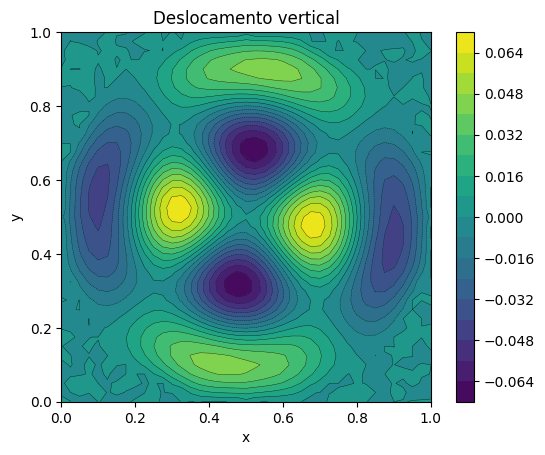

In [6]:
import numpy as np
import scipy as scp
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Função para plotar as curvas de nível constante de temperatura
def plota_membrana(num_x, num_y, comprimento_x, comprimento_y, deslocamento):
    x = np.linspace(0, comprimento_x, num_x)
    y = np.linspace(0, comprimento_y, num_y)
    X, Y = np.meshgrid(x, y)
    Z = np.copy(deslocamento)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    contornos = ax.contourf(X, Y, Z, 20)
    contornos_linha = ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(contornos, ax=ax)
    plt.show()

# Função para plotar a superfície 3D do deslocamento
def plota_superficie(num_x, num_y, comprimento_x, comprimento_y, deslocamento):
    x = np.linspace(0, comprimento_x, num_x)
    y = np.linspace(0, comprimento_y, num_y)
    X, Y = np.meshgrid(x, y)
    Z = np.copy(deslocamento)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    ax.set_zlim(-1.01, 1.01)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

# Função para converter índices i, j em um índice único
def ij_para_n(i, j, num):
    return i + j * num

# Função para construir a matriz de rigidez e massa para uma membrana circular
def construir_matriz_circular(num, sigma, densidade, espessura, raio):
    num_incognitas = num ** 2
    h = 1 / (num - 1)
    
    # Matriz de rigidez K
    d1 = 4.0 * np.ones(num_incognitas)
    d2 = -np.ones(num_incognitas - 1)
    d3 = -np.ones(num_incognitas - num)
    K = (sigma / h ** 2) * scp.sparse.diags([d3, d2, d1, d2, d3], [-num, -1, 0, 1, num], format='csr')
    
    # Número grande para bordas
    numero_grande = 1000000
    Iden = numero_grande * scp.sparse.identity(num_incognitas, format='csr')
    
    for i in range(num):
        xi = i * h
        for j in range(num):
            yj = j * h
            if np.sqrt((xi - 0.5) ** 2 + (yj - 0.5) ** 2) > raio:
                Ic = ij_para_n(i, j, num)
                K[Ic, :] = Iden[Ic, :]
    
    # Matriz de massa M
    M = densidade * espessura * scp.sparse.identity(num_incognitas, format='csr')
    return K, M

# Função para construir a matriz de rigidez e massa com densidade variável
def construir_matriz_var_rho(num_x, num_y, comprimento_x, comprimento_y, sigma, espessura):
    num_incognitas = num_x * num_y
    dx = comprimento_x / (num_x - 1)
    dy = comprimento_y / (num_y - 1)
    
    # Matriz de rigidez K
    d1 = 4.0 * np.ones(num_incognitas)
    d2 = -1.0 * np.ones(num_incognitas - 1)
    d3 = -1.0 * np.ones(num_incognitas - num_x)
    K = (sigma / dx ** 2) * scp.sparse.diags([d3, d2, d1, d2, d3], [-num_x, -1, 0, 1, num_x], format='csr')
    M = scp.sparse.identity(num_incognitas, format='csr')
    
    # Número grande para bordas
    numero_grande = 10000
    Iden = numero_grande * scp.sparse.identity(num_incognitas, format='csr')
    
    # colunas esquerda e direita
    for k in range(num_y):
        Ic = ij_para_n(0, k, num_x)  # Esquerdo
        K[Ic, :], K[:, Ic] = Iden[Ic, :], Iden[:, Ic]
        
        Ic = ij_para_n(num_x - 1, k, num_x)  # Direito
        K[Ic, :], K[:, Ic] = Iden[Ic, :], Iden[:, Ic]
    
    # linha inferior e superior
    for k in range(num_x):
        Ic = ij_para_n(k, 0, num_x)  # Inferior
        K[Ic, :], K[:, Ic] = Iden[Ic, :], Iden[:, Ic]
        
        Ic = ij_para_n(k, num_y - 1, num_x)  # Superior
        K[Ic, :], K[:, Ic] = Iden[Ic, :], Iden[:, Ic]
    
    for i in range(num_x):
        xij = i * dx
        for j in range(num_y):
            yij = j * dy
            Ic = ij_para_n(i, j, num_x)
            M[Ic, Ic] = (1 + 0.75 * np.cos(4 * np.pi * xij) * np.cos(2 * np.pi * yij)) * espessura
    
    return K, M

# Parâmetros do problema
densidade = 1
espessura = 1
sigma = 1
num_pontos = 41
raio = 0.5

# Construção das matrizes K e M
K, M = construir_matriz_circular(num_pontos, sigma, densidade, espessura, raio)

# Cálculo dos autovalores e autovetores
autovalores, autovetores = scp.sparse.linalg.eigsh(K, k=14, M=M, which='SM')
frequencias_omega = np.sqrt(autovalores)
indice_modo = 13
modo_vibracao = autovetores[:, indice_modo]
deslocamento_plot = modo_vibracao.reshape(num_pontos, num_pontos)

# Plotagem da membrana
plota_membrana(num_pontos, num_pontos, 1, 1, deslocamento_plot)


In [7]:
e=1
sigma=1
L1=1
L2=0.5
N1=40
N2=20
K,M = construir_matriz_circular (N1, N2, L1, L2, sigma, e)
Lam, Q = scp.sparse.linalg.eigsh(K, k=14, M=M, which='SM')
omegas = np.sqrt(Lam)
k = 13
mode = Q[:,k]
Wplot = mode.reshape(N2,N1)
plota_membrana (N1,N2,L1,L2,Wplot)

TypeError: construir_matriz_circular() takes 5 positional arguments but 6 were given